In [1]:
import pandas as pd 
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
df=pd.read_csv('subscribers.csv')

In [3]:
df['cancel_date_bool']=df['cancel_date'].isna()

In [4]:
#create churn column 
def function(a, b):
    if a==True and b ==True:
        return 0
    else:
        return 1

df['churn'] = df.apply(lambda x: function(x.current_sub_TF, x.cancel_date_bool), axis = 1)


In [5]:
df.to_csv('Churn.csv')

In [6]:
df.drop(df.columns[ : 2], axis=1,inplace=True) 

In [7]:
df.drop(['country','plan_type','months_per_bill_period','language','trial_end_date','trial_completed','num_trial_days','trial_end_date','last_payment','monthly_price','attribution_survey','next_payment'], inplace = True, axis = 1)







In [8]:
df.drop(['account_creation_date','cancel_date','cancel_date_bool'],axis=1,inplace=True)


In [9]:
# in the age columns, several number are more than 100 or smaller than 0, which seems inaccurate, delete these rows. 
df=df[(df['age']<100) & (df['age']>5) & (df['weekly_consumption_hour']>0) & (df['join_fee']>0)]

In [10]:
# to create dummy variables, first fill nan value with unknow
df[['package_type','preferred_genre','op_sys','initial_credit_card_declined','intended_use','male_TF','attribution_technical','payment_type']]=df[['package_type','preferred_genre','op_sys','initial_credit_card_declined','intended_use','male_TF','attribution_technical','payment_type']].fillna('Unknow')

In [11]:
# then fill missing value with their average number
df=df.fillna(df.mean())

In [12]:
df=pd.get_dummies(df, columns=['package_type','preferred_genre','op_sys','initial_credit_card_declined','intended_use','male_TF','attribution_technical','payment_type'], sparse=False, drop_first=True, dtype=int)


In [13]:
df.drop('current_sub_TF', axis=1, inplace=True)

In [14]:
df_period0=df[df['payment_period']==0]

In [15]:
df_long=df[df['payment_period']!=0]

In [16]:
df_long.drop('payment_period', axis=1, inplace=True)

/Users/natalie/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
df_period0.drop('payment_period', axis=1, inplace=True)

In [18]:
df_long

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,discount_price,join_fee,churn,package_type_base,package_type_economy,package_type_enhanced,...,attribution_technical_search,attribution_technical_tv,attribution_technical_twitter,attribution_technical_vod,attribution_technical_youtube,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,payment_type_Unknow
1,3.011497,22.951579,2.062343,70.0,4.5141,0.3303,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4.000000,22.951579,3.000000,28.0,4.5141,0.0367,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3.011497,20.051667,2.062343,70.0,4.5141,0.3303,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,2.000000,20.051667,2.000000,61.0,4.5141,0.3303,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8,3.011497,25.851492,2.062343,73.0,4.5141,0.6606,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227615,3.011497,24.401536,2.062343,30.0,4.5141,0.0367,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
227621,3.011497,28.751405,2.062343,61.0,4.5141,0.3303,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
227623,3.000000,28.751405,2.000000,38.0,4.5141,0.3303,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
227624,2.000000,27.301448,2.000000,49.0,4.5141,0.3303,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [19]:
df_period0

,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,discount_price,join_fee,churn,package_type_base,package_type_economy,package_type_enhanced,...,attribution_technical_search,attribution_technical_tv,attribution_technical_twitter,attribution_technical_vod,attribution_technical_youtube,payment_type_Najim,payment_type_Paypal,payment_type_RAKBANK,payment_type_Standard Charter,payment_type_Unknow
2,3.000000,36.001186,2.000000,25.0,4.5141,0.1101,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,3.011497,20.051667,2.062343,30.0,4.5141,0.0367,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
9,3.000000,28.751405,2.000000,71.0,4.5141,0.3303,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
12,2.000000,28.751405,2.000000,57.0,4.5141,0.0367,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
13,3.000000,33.101274,2.000000,54.0,4.5141,0.0367,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227606,3.000000,30.201361,2.000000,34.0,4.5141,0.0367,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
227613,3.000000,21.501623,2.000000,45.0,4.5141,0.0367,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
227614,2.000000,30.201361,2.000000,52.0,4.5141,0.0367,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
227618,3.011497,37.451142,2.062343,67.0,4.5141,0.0367,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
df_long['churn'].value_counts()

0    81290
1     7418
Name: churn, dtype: int64

In [21]:
df_period0['churn'].value_counts()

1    62334
0     5096
Name: churn, dtype: int64

In [22]:
X_0 = df_period0.loc[:, df_period0.columns != 'churn']
y_0 = df_period0.loc[:, df_period0.columns == 'churn']

In [23]:
X_1 = df_long.loc[:, df_long.columns != 'churn']
y_1 = df_long.loc[:, df_long.columns == 'churn']

In [24]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.3, random_state=0)

In [25]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [26]:
import seaborn as sns
sns.set(style="white")

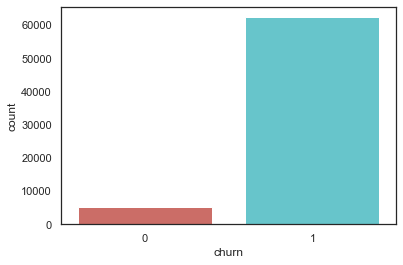

In [27]:
sns.countplot(x='churn',data=df_period0,palette='hls')
plt.show()

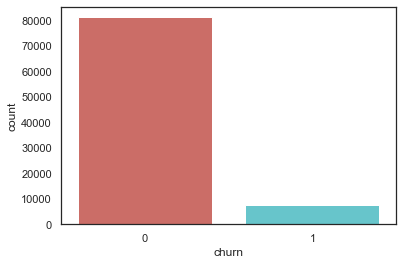

In [28]:
sns.countplot(x='churn',data=df_long,palette='hls')
plt.show()

In [87]:
clf_0 = LogisticRegression(random_state=0,class_weight='balanced').fit(X_train_0, y_train_0)

/Users/natalie/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/natalie/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
clf_0.coef_

array([[-1.00437784e+00, -5.19819043e-02,  4.07168328e-02,
         3.92837131e-02,  1.11403966e+00, -3.52998872e+00,
        -1.16429916e+00, -2.99135667e-01, -1.77944629e+00,
        -1.64645245e+00, -6.54141880e-01, -7.10636726e-01,
        -3.74803947e-02, -7.29161474e-01, -7.41190530e-02,
         4.45435049e-03, -3.22159946e-01, -1.58416222e+00,
         1.12077558e+00,  1.92166913e+00,  2.16363224e+00,
        -4.92789908e-01,  1.33097350e-01, -1.20932338e+00,
         8.54699194e-01, -9.55356835e-02,  6.73332738e-01,
        -5.29115563e-01,  1.39797299e+00,  6.96631845e-01,
         7.58177637e-03,  4.05371827e-02,  3.58105591e-03,
         1.27114901e+00,  7.80383805e-01, -1.82828412e+00,
         5.23950441e-04,  1.53238071e+00,  1.05416319e+00,
        -5.98838341e-01, -7.62051513e-03,  2.02082520e-01,
        -2.08482921e-01, -4.61420477e-01, -3.72415550e-02,
         1.88378969e+00,  2.30302889e-02,  1.18110414e-02,
        -6.37273226e-01,  6.46889991e-02,  8.26588243e-0

In [93]:
clf0=[]
for i in clf_0.coef_:
    for n in i:
        clf0.append(n)

In [95]:
C0=pd.DataFrame(clf0,X_train_0.columns)

In [96]:
C0.to_csv('coefficient_for_period0.csv')

In [31]:
clf_0.score(X_test_0,y_test_0)

0.8062187947995452

In [32]:

roc_auc_score(y_test_0, clf_0.predict(X_test_0))

0.8182823837367482

In [33]:

confusion_matrix1 = confusion_matrix(y_test_0, clf_0.predict(X_test_0))
print(confusion_matrix1)

[[ 1247   251]
 [ 3669 15062]]


In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_0, clf_0.predict(X_test_0))

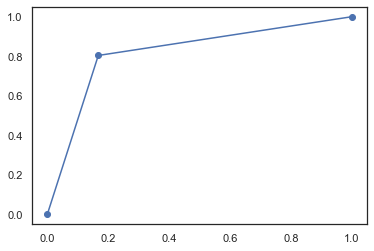

In [35]:
plt.plot(fpr,tpr,marker='o')
plt.show()

In [36]:

clf_1 = LogisticRegression(random_state=0,class_weight='balanced').fit(X_train_1, y_train_1)

/Users/natalie/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/natalie/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
clf_1.score(X_test_1,y_test_1)

0.8078758501484237

In [38]:
roc_auc_score(y_test_1, clf_1.predict(X_test_1))

0.8228396712368793

In [39]:

confusion_matrix = confusion_matrix(y_test_1, clf_1.predict(X_test_1))
print(confusion_matrix)

[[19652  4763]
 [  350  1848]]


In [40]:
fpr1, tpr1, thresholds = metrics.roc_curve(y_test_1, clf_1.predict(X_test_1))

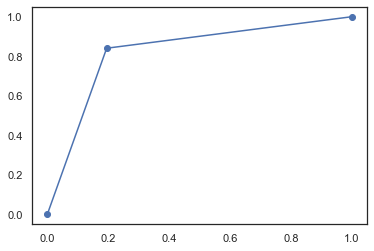

In [41]:
plt.plot(fpr1,tpr1,marker='o')
plt.show()

In [42]:

array1 = clf_1.coef_
#temp = array.argsort()
#ranks = np.empty_like(temp)
#ranks
order1 = array1.argsort()
ranks1 = order1.argsort()


In [97]:
coef1=[]
for i in clf_1.coef_:
    for n in i:
        #print(n)
        coef1.append(n)

In [98]:
C1=pd.DataFrame(coef1,X_1.columns)

In [99]:
C1.to_csv('coefficient_for_period_long.csv')